# ME460 Linkages - Prof. Mark Ganter
# 4 position path generator via dyad-standard and characteristic equations
# with circle-point & center point curves

index= 51


<IPython.core.display.Javascript object>


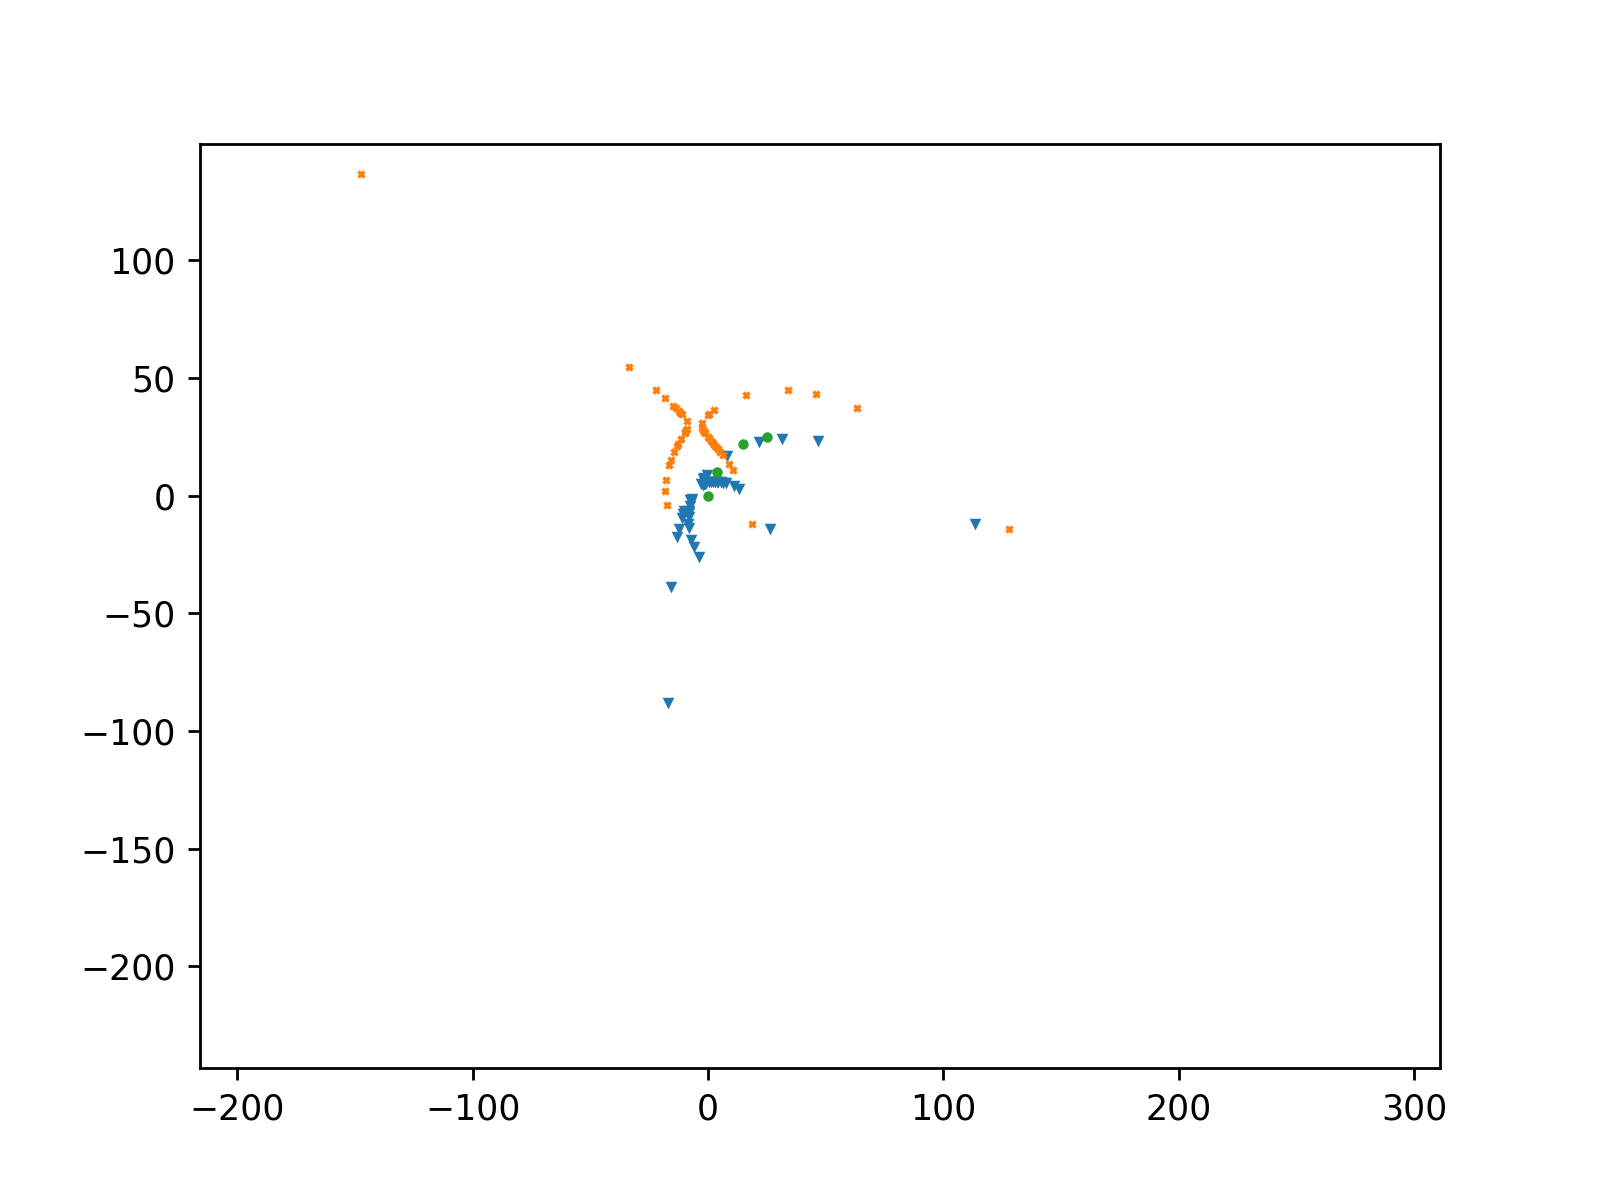

In [3]:
# values from the T.Chase Centerpoint Paper & Myszka Centerpoint Paper
# Code by: M.A.Ganter @ 2023

%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#define random angle function
def randang():
   return(2*np.pi*random.random())

# define a problem epsilon (for Nsolve)
EPSILON = 1.0e-6
# define residual epsilon
RES_EPSILON = 1.0e-2

d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

numpoints = 1600
# k = circle-point (or moving pivot)
kLptx = np.zeros(numpoints)
kLpty = np.zeros(numpoints)
kLang = np.zeros(numpoints)
kRptx = np.zeros(numpoints)
kRpty = np.zeros(numpoints)
kRang = np.zeros(numpoints)

# m = center-point (or ground pivot)
mLptx = np.zeros(numpoints)
mLpty = np.zeros(numpoints)
mLang = np.zeros(numpoints)
mRptx = np.zeros(numpoints)
mRpty = np.zeros(numpoints)
mRang = np.zeros(numpoints)

# gamma 3 & 4 arrays
gamma3 = np.zeros(numpoints)
gamma4 = np.zeros(numpoints)

# 4 precision coupler points

# points from Chase's paper (Verified results 11/2020)
c1 = 0+I*0
c2 = 4+I*10
c3 = 15+I*22
c4 = 25+I*25

# points from Myszka paper (Verified results 11/2020)
#c1 = 0+I*0 #Myszka paper
#c2 = 1+I*1 #Myszka paper
#c3 = 2+I*(-1) #Myszka paper
# c4 = 2.7071+I*(-2.2247) #Myszka paper 4a
# c4 = -2.0+I*(-1.0)  #Myszka paper 4b
#c4 = 0.7753+I*(-2.2247)  #Myszka paper 4c

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

del2 = c2-c1
del3 = c3-c1
del4 = c4-c1

# points from Chase's paper (Verified results 11/2020)
p2 = radians(30)
p3 = radians(60)
p4 = radians(90)

# points from Myszka paper (Verified results 11/2020)
#p2 = radians(90)    #Myszka paper 
#p3 = radians(165)    #Myszka paper
#p4 = radians(75)  #Myszka paper 4a
#p4 = radians(75)   #Myszka paper 4b
#p4 = radians(-75)   #Myszka paper 4c

# LEFT SIDE #
#write out the dyad-standard equations for left side of linkage 
# posl1 = r1+r2 - c1
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r2*(exp(I*g4)-1) - del4

# move determinant & char. equation generation outside of the loop
leftside = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],[(exp(I*p4)-1),(exp(I*g4)-1),del4]])
detleft = leftside.det()

index = 0

# Scale is fraction of angle
SCALE = 1
LOOPEND = 360*SCALE
# we want to sample 0->360 in some whole or fraction of a degree.
# if the computations take too long, you can reduce your sampling by changing the 2 to a 5 or a 10 in the next line
for i in range(1,LOOPEND,5):
    
    # print progress meter
    if (i%100 == 0):  
        print("i=",i)

# solution for left side of linkage 

    # characteristic polynomial approach
    angle = radians(float(i)/SCALE)
    if angle == p2 :
        print("angle = p2")
    # use detleft from outside loop
    detlefta = detleft.subs(g2,angle)
    #print("detlefta=",detlefta)

    #next solve left characteristic equation for g3 and g4
    ans = nsolve((re(detlefta),im(detlefta)), (g3, g4), (randang(),randang()), 
            maxsteps=100, tol=EPSILON, verify=false)  

    #print("left char solution g3 & g4",degrees(ans[0]),degrees(ans[1]))
    #print ("abs(left_char)=",abs(detlefta.evalf(subs={g3:ans[0],g4:ans[1]}) ))
    #print()
    
    res1 = abs(detlefta.evalf(subs={g3:ans[0],g4:ans[1]}))

    # now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
    pos2a = posl2.subs(g2,angle)
    pos3a = posl3.subs(g3,ans[0])
    pos4a = posl4.subs(g4,ans[1])
    #print('g3=',degrees(ans[0])%360,'g4=',degrees(ans[1])%360)

    # set g's before information is overwritten
    g2a = angle
    g3a = ans[0]
    g4a = ans[1]
    
    # dyad-standard solver for R1 & R2
    ansl = nsolve((re(pos3a),im(pos3a),re(pos4a),im(pos4a)), (d1, t1, d2, t2), 
            (2,randang(),5,randang()), maxsteps=100, tol=EPSILON, verify=false)

    #print("augmented left dyad solution: r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
    #print ("abs(pos3a)=",N(abs(pos3a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
    #print ("abs(pos4a)=",N(abs(pos4a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
    #print()
    
    # compute residuals magnitude of pos.3 and pos.4 equations.       
    res2 = (abs(pos2a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}))  +
            abs(pos3a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}))  +
            abs(pos4a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]})) )
    
    #print('res1=',res1,'res2=',res2)

    # compute values of vectors R1 & R2
    evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
    evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
               
    # check if solution passes the residual test and if so, then keep the results. 
    if ((res1 < RES_EPSILON) & (res2 < RES_EPSILON)):           

    # circle point curve (A)
        kLptx[index]=re(c1-evalr2)
        kLpty[index]=im(c1-evalr2)
        kLang[index]=angle

    # center point curve (Oa)
        mLptx[index]=re(c1-evalr2-evalr1)
        mLpty[index]=im(c1-evalr2-evalr1)
        mLang[index]=angle
        
    # save gamma3 & gamma4
        gamma3[index]=g3a
        gamma4[index]=g4a
        
    # increment the index
        index = index+1
        
    else:
        #print("EPS1/2 Bounds")
        continue

# bottom of loop

#print out number of solutions whose residuals were with tolerance
print('index=',index)


# call matplotlib routines for a scatter plot 
# plot of left curves
fig, ax = plt.subplots()
ax.plot(kLptx[:index-1], kLpty[:index-1],'v', mLptx[:index-1], mLpty[:index-1],'x',
         [re(c1),re(c2),re(c3),re(c4)],[im(c1),im(c2),im(c3),im(c4)],'o',ms=2)
ax.set_aspect('equal',adjustable='datalim')
plt.show()

#end of code


In [7]:
# run the top cell first & then run this code block.  Note: it can be run multiple times.
# Use Zelle graphics to display center-pt/circle-pt curves and allow user to select a center-pt location 
# from the orange curve
#
# the cursor selection will be found in the table data.  Both the center-pt and circle-pt data will be
# printed and displayed.

# Code by: M.A.Ganter @ 2023

from graphics import *
win = GraphWin("Left CirclePT/CenterPT", 400,400)
win.setCoords(-50,-50,50,50)

#plot the path points C1-C4
p = Point(re(c1),im(c1))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)
p = Point(re(c2),im(c2))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)
p = Point(re(c3),im(c3))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)
p = Point(re(c4),im(c4))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)

#plot the circle points 
for i in range(0,index):
    p = Point(kLptx[i],kLpty[i])
    p.setFill("blue")
    p.draw(win)
    
#plot the center points 
for i in range(0,index):
    p = Point(mLptx[i],mLpty[i])
    p.setFill("orange")
    p.draw(win)
    
p = win.getMouse() # pause for click in window
xc = p.getX()
yc = p.getY()

# search for pick point in the table data.
min_distance = 1/EPSILON
min_index = -1

for i in range(0,index):
    distance = sqrt((xc-mLptx[i])**2+(yc-mLpty[i])**2)
    if (distance < min_distance):
        min_distance = distance
        min_index = i
        
# print out the actual table data and plot the graphics results.
print("CirclePt XY         CenterPt XY       G2     G3     G4")
print("[%6.2f, % 6.2f] [%6.1f, % 6.1f] % 6.1f % 6.1f % 6.1f" %
          (kLptx[min_index], kLpty[min_index], mLptx[min_index],mLpty[min_index], 
           degrees(kLang[min_index])%360,degrees(gamma3[min_index])%360,degrees(gamma4[min_index])%360))

p = Point(mLptx[min_index],mLpty[min_index])
p.setFill("red")   
p.draw(win)
Circle(p, 3).draw(win)

p = Point(kLptx[min_index],kLpty[min_index])
p.setFill("red")
p.draw(win)
Circle(p, 3).draw(win)

win.getMouse()
win.close()

CirclePt XY         CenterPt XY       G2     G3     G4
[ 26.26, -13.74] [  18.6,  -11.9]  346.0  315.4  288.8
